<a href="https://colab.research.google.com/github/sheriftawfikabbas/machinelearningphonons_tutorial/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


425.91589286373187
0.8198208373229525
60.777342498069515
0.9762715702913627


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]2017.7584364603197
0.1464088763593373
2159.2259695977486
0.15700424633913967
[04:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
529.3653378249048
0.7760576561765917
1.564680321227242e-07
0.9999999999389124


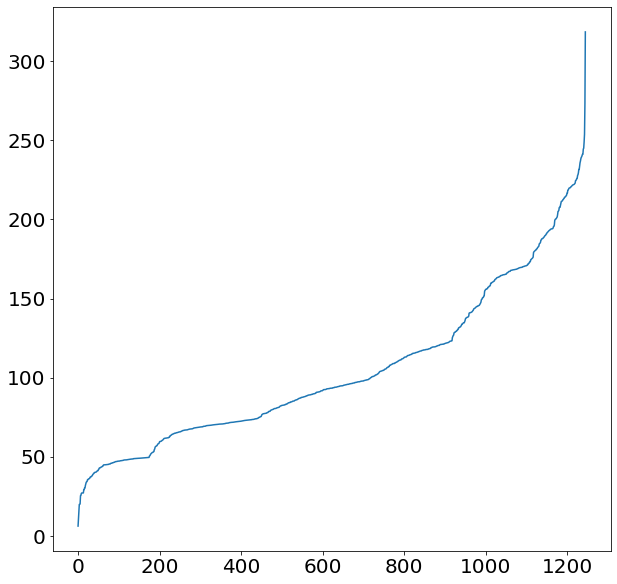

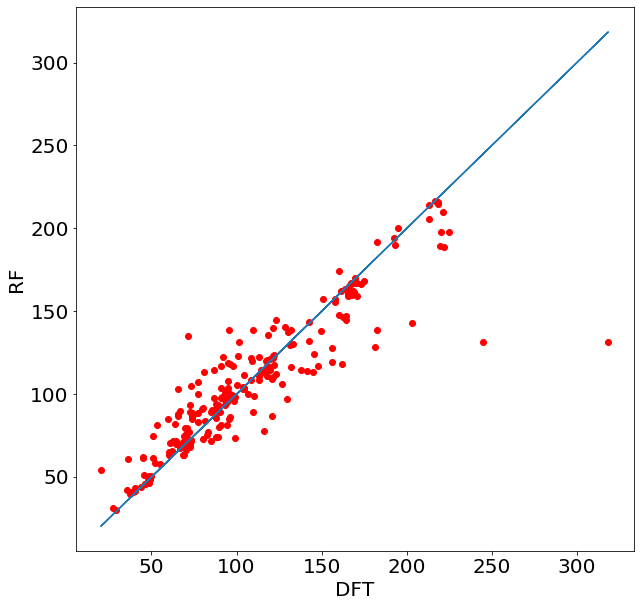

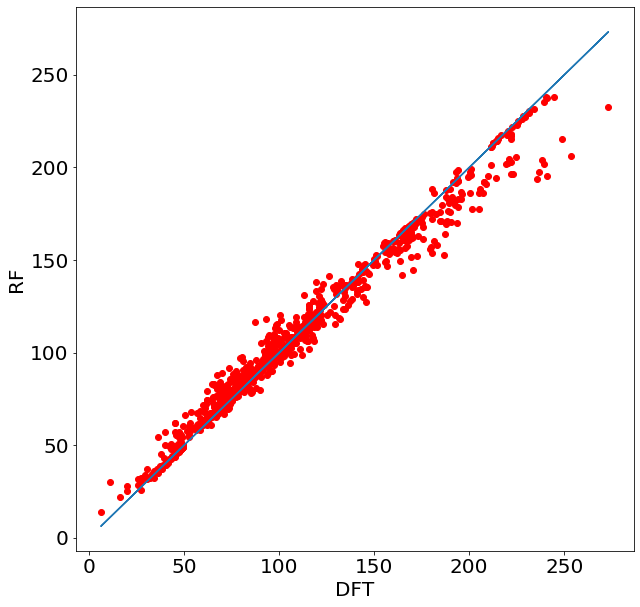

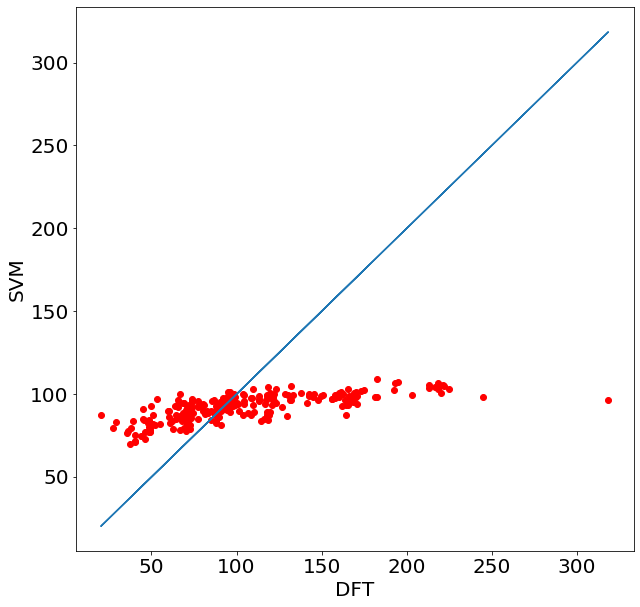

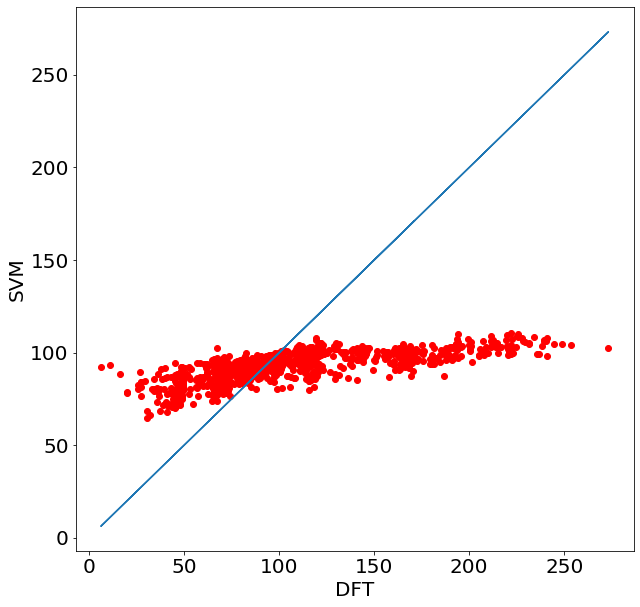

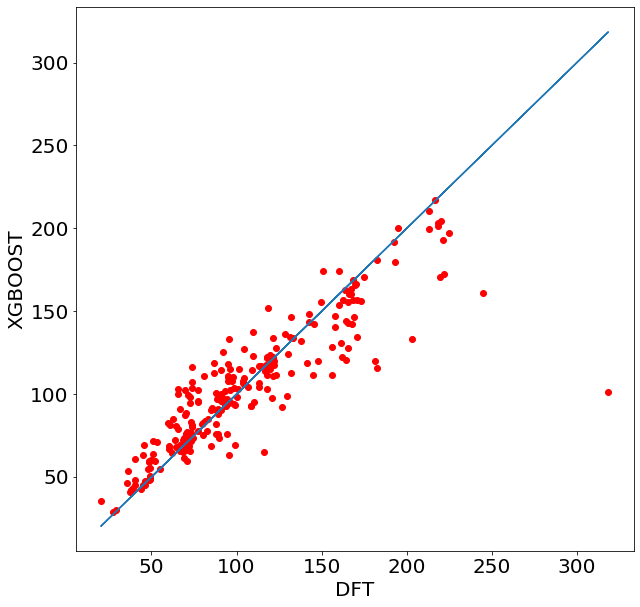

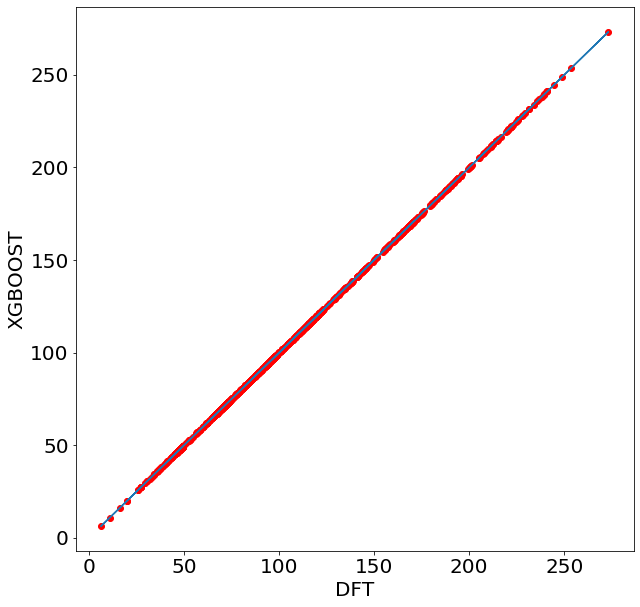

In [0]:
# Imports
 
# System libraries
import os
import warnings
 
# Tools
 
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn import decomposition, datasets
 
# Models
from sklearn import svm, linear_model
from xgboost import XGBRegressor, plot_importance
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
 
# Utilities
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

x=pd.read_csv('https://github.com/sheriftawfikabbas/machinelearningphonons_tutorial/raw/master/X.csv',header=None)
y=pd.read_csv('https://github.com/sheriftawfikabbas/machinelearningphonons_tutorial/raw/master/y_C_v.csv',header=None)


# Visualize the C_v data. Helps in outlier detection
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
plt.plot(np.array(y.sort_values(by=0)))
plt.savefig('Outliers', bbox_inches='tight')

# Apply scalar normalization of the input data
scaler = StandardScaler().fit(x)

# Scale the train set
x = scaler.transform(x)

# Split the input and output into the training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    x, y, test_size=.2, random_state=None)

# Convert the numpy arrays into pandas dataframes
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

# Save the dataframes
X_train_scaled.to_csv("X_train_scaled.csv")
X_test_scaled.to_csv("X_test_scaled.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")


regr_names = ['RF', 'SVM', 'XGBOOST']
regr_objects = [RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0),
                svm.SVR(kernel='rbf', epsilon=0.1, verbose=True),
                XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=400, alpha=10, n_estimators=400)
                ]

for regr_choice in range(3):
    regr = regr_objects[regr_choice]
    regr_name = regr_names[regr_choice]

    regr.fit(X_train_scaled, y_train)

    y_predicted = regr.predict(X_test_scaled)

    print(mean_squared_error(y_test, y_predicted))
    print(r2_score(y_test, y_predicted))

    errors_file = open(regr_name+'_Test_Analysis.txt', 'w')
    errors_file.write(
        'RMSE\t'+str(np.sqrt(mean_squared_error(y_test, y_predicted)))+'\n')
    errors_file.write('r2\t'+str(r2_score(y_test, y_predicted))+'\n')
    errors_file.close()

    xPlot = y_test
    yPlot = y_predicted
    plt.figure(figsize=(10, 10))
    plt.plot(xPlot, yPlot, 'ro')
    plt.plot(xPlot, xPlot)
    plt.ylabel(regr_name)
    plt.xlabel('DFT')
    plt.savefig(regr_name+'_Correlation_Test', bbox_inches='tight')

    y_predicted = regr.predict(X_train_scaled)

    print(mean_squared_error(y_train, y_predicted))
    print(r2_score(y_train, y_predicted))

    errors_file = open(regr_name+'_Train_Analysis.txt', 'w')
    errors_file.write(
        'RMSE\t'+str(np.sqrt(mean_squared_error(y_train, y_predicted)))+'\n')
    errors_file.write('r2\t'+str(r2_score(y_train, y_predicted))+'\n')
    errors_file.close()

    xPlot = y_train
    yPlot = y_predicted
    plt.figure(figsize=(10, 10))
    plt.plot(xPlot, yPlot, 'ro')
    plt.plot(xPlot, xPlot)
    plt.ylabel(regr_name)
    plt.xlabel('DFT')
    plt.savefig(regr_name+'_Correlation_Train', bbox_inches='tight')

    from sklearn.externals import joblib
    joblib.dump(regr, ''+regr_name+'.pkl')